<a href="https://colab.research.google.com/github/lenkaflorienkaa/machinelearning_2024/blob/main/jobsheet3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LAB WORK 1

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('dataset.csv')

In [3]:
# inspect first data
data.head()

# check data size
data.shape

# check general information
data.info()

# check data description
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


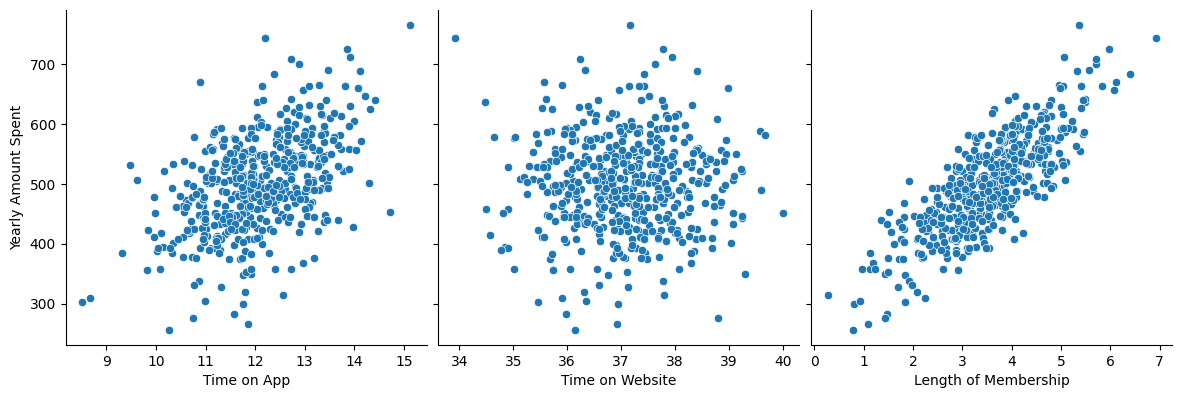

ValueError: could not convert string to float: 'mstephenson@fernandez.com'

In [6]:
# import library
import matplotlib.pyplot as plt
import seaborn as sns

# visualize the data using pairplot
sns.pairplot(data, x_vars=['Time on App', 'Time on Website', 'Length of Membership'],
             y_vars='Yearly Amount Spent', size=4, aspect=1, kind='scatter')
plt.show()

# visualize the data correlation using heatmaps
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

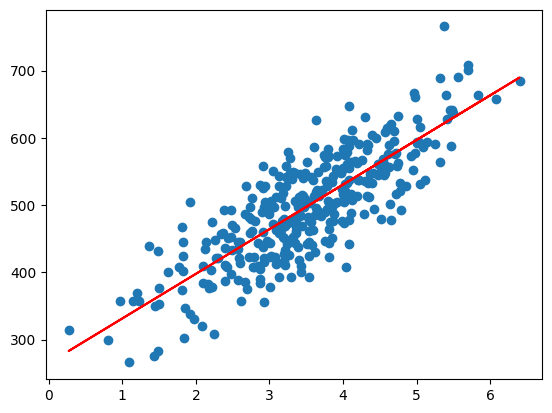

In [9]:
# X is independen variabel, Y is dependen variable
X = data['Length of Membership']
y = data['Yearly Amount Spent']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# Training model
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()

plt.scatter(X_train, y_train)
plt.plot(X_train, 265.2483 + 66.3015*X_train, 'r')
plt.show()

<ipython-input-10-0c93ba5dbe5a>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins=15)


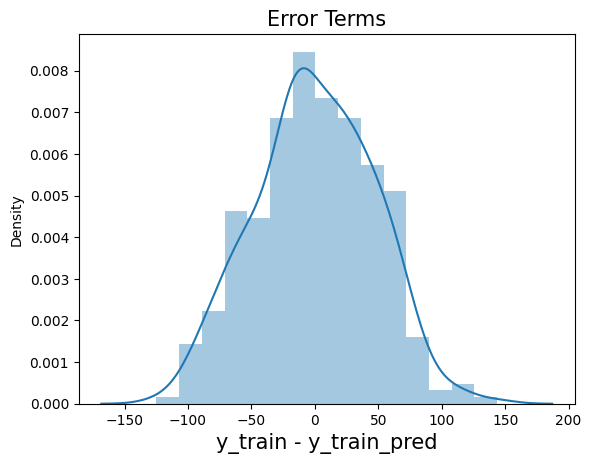

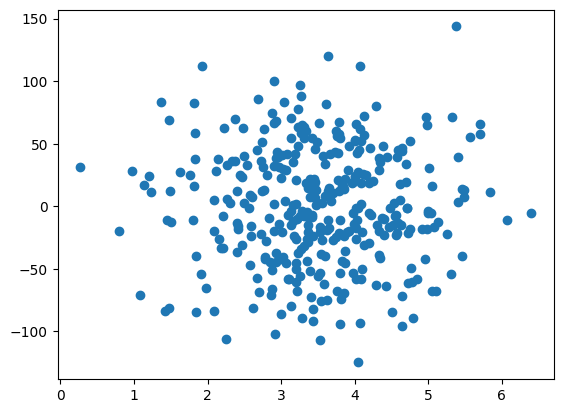

In [10]:
# Make prediction
y_train_pred = lr.predict(X_train_sm)

# Calculate residual
res = (y_train - y_train_pred)

# Histogram residual
fig = plt.figure()
sns.distplot(res, bins=15)
plt.title('Error Terms', fontsize=15)
plt.xlabel('y_train - y_train_pred', fontsize=15)
plt.show()

# Scatter plot residual
plt.scatter(X_train, res)
plt.show()

In [12]:
# Make a prediction using testing data
X_test_sm = sm.add_constant(X_test)
y_test_pred = lr.predict(X_test_sm)

from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_test_pred)

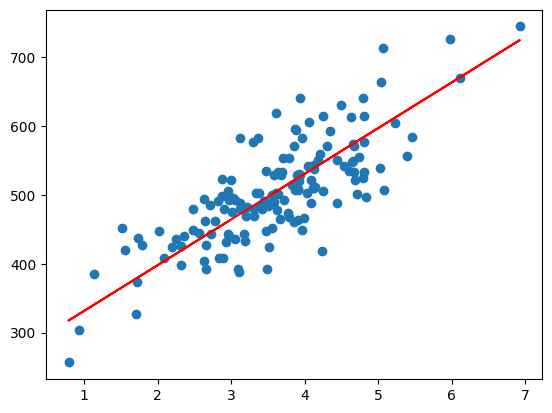

In [13]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

# LAB WORK 2

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
dataset = pd.read_csv('Posisi_gaji.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values  # Ubah menjadi satu kolom saja

In [16]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1, 1))
y = sc_y.fit_transform(y.reshape(-1, 1))

In [17]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

<ipython-input-18-e63ebe097fbe>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1)


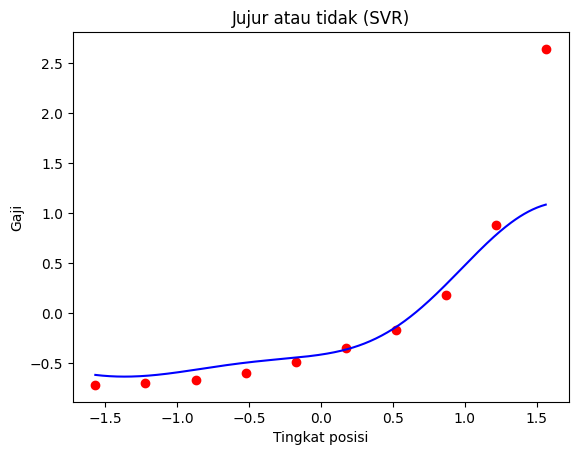

In [18]:
X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1)
plt.scatter(X, y, color='red')
plt.plot(X_grid, regressor.predict(X_grid), color='blue')
plt.title('Jujur atau tidak (SVR)')
plt.xlabel('Tingkat posisi')
plt.ylabel('Gaji')
plt.show()

In [19]:
# Create 2D Array
tingkat_posisi_prediksi = np.array([[6.5]])
# Scaled predicted data
tingkat_posisi_prediksi = sc_X.transform(tingkat_posisi_prediksi)
# Make a prediction
gaji_prediksi = regressor.predict(tingkat_posisi_prediksi)
# Rescale the result --> back to the original data
gaji_prediksi = sc_y.inverse_transform(gaji_prediksi.reshape(-1, 1))

In [20]:
# Show result
print("Prediksi Gaji untuk Tingkat Posisi 6.5:", gaji_prediksi[0])

Prediksi Gaji untuk Tingkat Posisi 6.5: [170370.0204065]


In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_actual = y
y_pred = regressor.predict(X)

# MAE
mae = mean_absolute_error(y_actual, y_pred)

# MSE
mse = mean_squared_error(y_actual, y_pred)

# RMSE
rmse = np.sqrt(mse)

# R-squared
r2 = r2_score(y_actual, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)

MAE: 0.22299274095734414
MSE: 0.24839989293792014
RMSE: 0.4983973243687411
R-squared: 0.7516001070620798


# LAB ASSIGNMENT

LOAD

In [25]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/insurance.csv', header=None,
                   names=['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'])

# Display the first few rows of the dataset
print(data.head())


   age     sex     bmi  children  smoker     region      charges
0  age     sex     bmi  children  smoker     region      charges
1   19  female    27.9         0     yes  southwest    16884.924
2   18    male   33.77         1      no  southeast    1725.5523
3   28    male      33         3      no  southeast     4449.462
4   33    male  22.705         0      no  northwest  21984.47061


PREPROCESS

In [26]:
# Convert categorical variables to numerical format
data_encoded = pd.get_dummies(data, columns=['sex', 'smoker', 'region'], drop_first=True)

# Define features and target variable
features = data_encoded.drop('charges', axis=1)
target = data_encoded['charges']


SPLIT DATA

In [27]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


FEATURE SCALING

In [34]:
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data
X_test_scaled = scaler.transform(X_test)

# Display the first few rows of the scaled training data
print("Scaled Training Data:")
print(pd.DataFrame(X_train_scaled, columns=X_train.columns).head())

# Display the first few rows of the scaled testing data
print("Scaled Testing Data:")
print(pd.DataFrame(X_test_scaled, columns=X_test.columns).head())


Scaled Training Data:
        age       bmi  children  sex_male  sex_sex  smoker_smoker  smoker_yes  \
0  0.472227 -1.756525  0.734336 -1.024602      0.0            0.0   -0.508747   
1  0.543313 -1.033082 -0.911192 -1.024602      0.0            0.0   -0.508747   
2  0.898745 -0.943687 -0.911192 -1.024602      0.0            0.0   -0.508747   
3 -0.025379  0.622393  3.202629 -1.024602      0.0            0.0   -0.508747   
4  1.040918 -1.504893  1.557100 -1.024602      0.0            0.0   -0.508747   

   region_northwest  region_region  region_southeast  region_southwest  
0          1.783168            0.0         -0.599661         -0.572314  
1         -0.560800            0.0         -0.599661         -0.572314  
2         -0.560800            0.0          1.667609         -0.572314  
3         -0.560800            0.0          1.667609         -0.572314  
4          1.783168            0.0         -0.599661         -0.572314  
Scaled Testing Data:
        age       bmi  children 

CREATE AND TRAIN MILTIPLE LINEAR REGRESSION MODEL

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Initialize the model
model_lr = LinearRegression()

# Train the model
model_lr.fit(X_train_scaled, y_train)

# Make predictions
y_pred_lr = model_lr.predict(X_test_scaled)

# Evaluate the model
r2_lr = r2_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)

print("Multiple Linear Regression Model:")
print(f"R-squared: {r2_lr:.2f}")
print(f"Mean Squared Error: {mse_lr:.2f}")
print(f"Mean Absolute Error: {mae_lr:.2f}")

Multiple Linear Regression Model:
R-squared: 0.78
Mean Squared Error: 33596915.85
Mean Absolute Error: 4181.19


CREATE AND TRAIN SVR MODEL

In [36]:
from sklearn.svm import SVR

# Initialize the SVR model
model_svr = SVR(kernel='rbf')  # Radial basis function kernel

# Train the SVR model
model_svr.fit(X_train_scaled, y_train)

# Make predictions
y_pred_svr = model_svr.predict(X_test_scaled)

# Evaluate the SVR model
r2_svr = r2_score(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)

print("Support Vector Regression Model:")
print(f"R-squared: {r2_svr:.2f}")
print(f"Mean Squared Error: {mse_svr:.2f}")
print(f"Mean Absolute Error: {mae_svr:.2f}")


Support Vector Regression Model:
R-squared: -0.07
Mean Squared Error: 166128803.81
Mean Absolute Error: 8612.41


VISUALIZATION

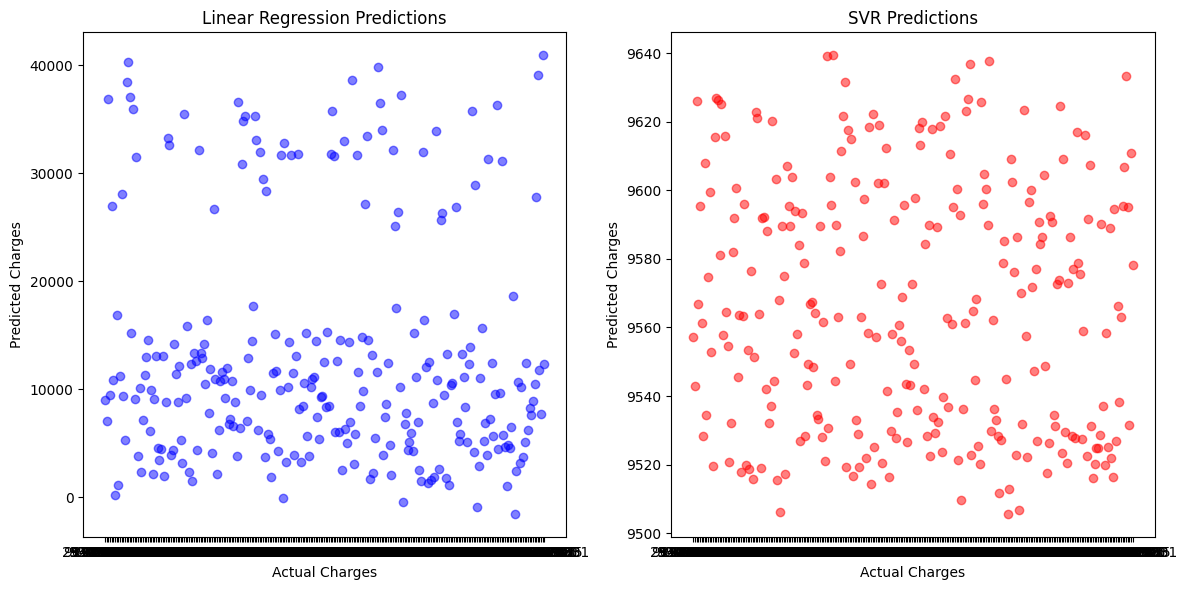

In [37]:
import matplotlib.pyplot as plt

# Scatter plot of predicted vs actual values for Linear Regression
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lr, color='blue', alpha=0.5)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Linear Regression Predictions')

# Scatter plot of predicted vs actual values for SVR
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_svr, color='red', alpha=0.5)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('SVR Predictions')

plt.tight_layout()
plt.show()
